# Importing Libraries

In [27]:
import numpy as np
import pandas as pd
import scipy, math
import matplotlib.pyplot as plt
import scipy.special as sc

# Parameters & Constants

### MLE Parameters

In [ ]:
#M_200 is on of the parameters we are trying to fit in MLE
M_200 = 6.8e+11 #M_solar

beta1 = 1/3
beta2 = -4/3
lmbda1 = 100
lmbda2 = 1

### Constants

In [53]:
M_solar = 1

G = 4.302e-6 #kpc m_solar-1 (km/s)^2
h = 0.671
rho_crit = 143.84*M_solar
Fctr = (M_200*h/((10**12)*M_solar))
r_s = 28.8*Fctr**(0.43)   ## in kpc
c = (10**(0.905))*Fctr**(-0.101)
rho_s = (200/3)*(c**3)*rho_crit/(np.log(1+c) - c/(1+c))



# V<sup>2</sup> Profiles

### V<sup>2</sup><sub>NFW</sub> Profile

In [20]:
def V_sq_nfw(r):
    return (4*(math.pi)*G*(r_s**3)*(rho_s)/r)*((-r/(r + r_s)) + np.log(1+r/r_s))    

### V<sup>2</sup><sub>mg</sub> Profile

In [41]:
def V_sq_mg_attr(r):
    term1 = math.exp((r_s + r)/lmbda1)*(r/lmbda1-1)*sc.expi(-(r_s+r)/lmbda1)
    term2 = math.exp(-(r_s+r)/lmbda1)*(1 + r/lmbda1)
    term3 = (math.exp(2*r_s/lmbda1))*(sc.expi(-r_s/lmbda1)) + (sc.expi(r_s/lmbda1)) -(sc.expi((r + r_s)/lmbda1))
    return (-2*math.pi*G*beta1*rho_s*(r_s**3)/r)*(2*r/(r_s + r)) + term1 + term2*term3

In [42]:
def V_sq_mg_repl(r):
    term1 = math.exp((r_s + r)/lmbda2)*(r/lmbda2-1)*sc.expi(-(r_s+r)/lmbda2)
    term2 = math.exp(-(r_s+r)/lmbda2)*(1 + r/lmbda2)
    term3 = (math.exp(2*r_s/lmbda2))*(sc.expi(-r_s/lmbda2)) + (sc.expi(r_s/lmbda2)) -(sc.expi((r + r_s)/lmbda2))
    return (OverflowError: math range error-2*math.pi*G*beta2*rho_s*(r_s**3)/r)*(2*r/(r_s + r)) + term1 + term2*term3

### Function Calling

In [57]:
R = np.linspace(0.1,500,50)
V_sq_DM = np.zeros((len(R),4))

V_sq_DM[:,0] = R
for i in range(len(R)):
    #print(R[i])
    V_sq_DM[i,1] = V_sq_nfw(R[i])
    V_sq_DM[i,2] = V_sq_mg_attr(R[i])
    V_sq_DM[i,3] = V_sq_mg_repl(R[i])


# Plots

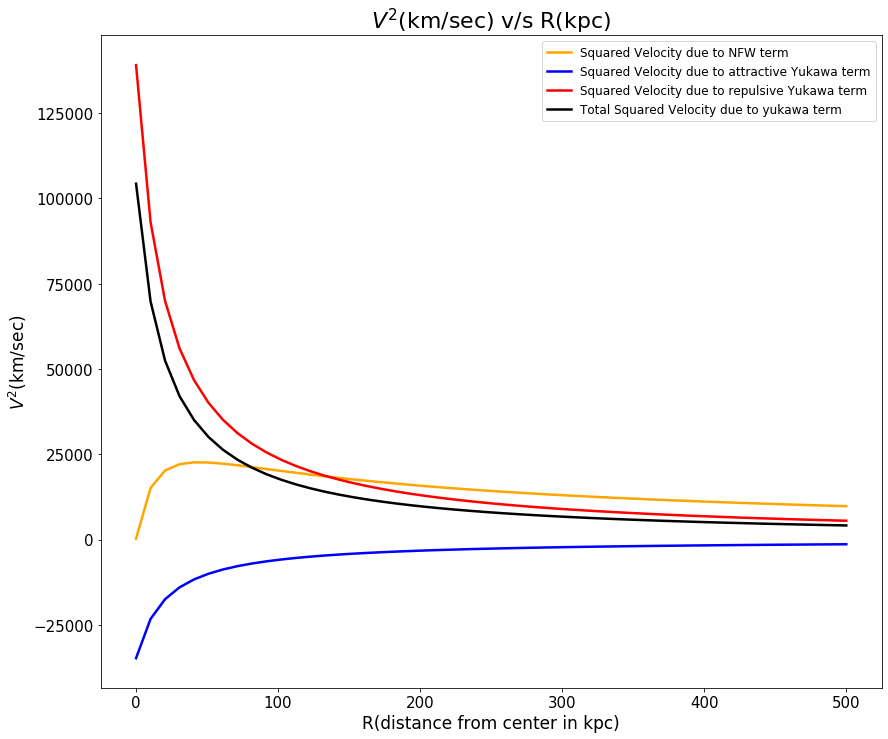

In [61]:
plt.plot(R, V_sq_DM[:,1], linewidth = 2.5, label = "Squared Velocity due to NFW term", color = "orange" )
plt.plot(R, V_sq_DM[:,2], linewidth = 2.5, label = "Squared Velocity due to attractive Yukawa term", color = "blue" )
plt.plot(R, V_sq_DM[:,3], linewidth = 2.5, label = "Squared Velocity due to repulsive Yukawa term", color = "red" )
plt.plot(R, V_sq_DM[:,2] + V_sq_DM[:,3], linewidth = 2.5, label = "Total Squared Velocity due to yukawa term", color = "black" )

plt.tick_params(axis='both', labelsize=15)
plt.xlabel('R(distance from center in kpc)', fontsize = 17)
#plt.xlim([0, 100])
#plt.ylim([0, 350])
plt.ylabel('$V^{2}$(km/sec)',  fontsize = 17)
plt.title('$V^{2}$(km/sec) v/s R(kpc)', fontsize = 22)
plt.legend(loc = 'upper right', fontsize = 12)
##plt.title( "r = " + str(result[0,0]) + ", phi = " + str(result[0,1])  + ", dphi/dr = "+ str(result[0,2]), fontsize=16)


fig = plt.gcf()
fig.set_size_inches(14,12)
plt.savefig("DM_Profile_29_Aug.png")
plt.show()

# NGC 3198 Data

In [62]:
ngc3198_data = pd.read_csv('NGC3198_rotmod.csv', sep='\t', 
                           header=0, usecols = ['# Rad','Vobs','errV','Vgas','Vdisk','Vbul','SBdisk','SBbul'])

In [63]:
ngc3198_data.head()

,# Rad,Vobs,errV,Vgas,Vdisk,Vbul,SBdisk,SBbul
0,0.32,24.4,35.90,0.00,63.28,0.0,1084.92,0.0
1,0.64,43.3,16.30,0.00,73.66,0.0,590.57,0.0
2,0.96,45.5,16.10,0.00,78.98,0.0,410.97,0.0
3,1.28,58.5,15.40,0.35,82.70,0.0,329.34,0.0
4,1.61,68.8,7.61,0.15,84.22,0.0,268.62,0.0


# MLE

In [ ]:
def Loglik(params):
    LL = -0.5*np.sum(ngc3198_data.Vobs - np.sqrt((ngc3198_data.Vgas)**2 + Y_d*(ngc3198_data.Vdisk)**2 + Y_b*(ngc3198_data.Vdisk)**2 + V_sq_DM[:,1]**2 + ))